In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
data = pd.read_csv("all_23_solenoids.csv")

In [6]:
data.head()

,x,y,z,bx,by,bz,particle,energy,volume
0,154.445178,359.245462,2630.0,1.414513,1.299509,5.132530,pi+,789.686626,Solenoid_1_FieldVolume
1,44.164876,-92.454653,-770.0,0.877024,-0.791369,11.120481,pi-,388.447367,Solenoid_1_FieldVolume
2,23.398420,88.311334,3480.0,0.142968,0.138199,3.421686,pi-,387.221715,Solenoid_1_FieldVolume
3,-25.606765,115.920574,930.0,-0.508498,-0.496528,11.120481,pi-,632.437296,Solenoid_1_FieldVolume
4,-229.261276,387.875146,4910.5,-1.751024,-1.507397,4.277108,pi-,631.643150,Solenoid_1_FieldVolume


In [7]:
z = np.array(data['z'].to_list())
bz = np.array(data['bz'].to_list())
particles = np.array(data['particle'].to_list())
energy = np.array(data['energy'].to_list())
print(len(z))

4520


In [8]:
pi_plus_pos = []
pi_plus_energy = []
pi_minus = []
mu_plus = []
mu_minus = []
for i in range(0, len(particles)):
    if particles[i] == "pi+":
        pi_plus_energy.append(energy[i])
        pi_plus_pos.append(z[i])

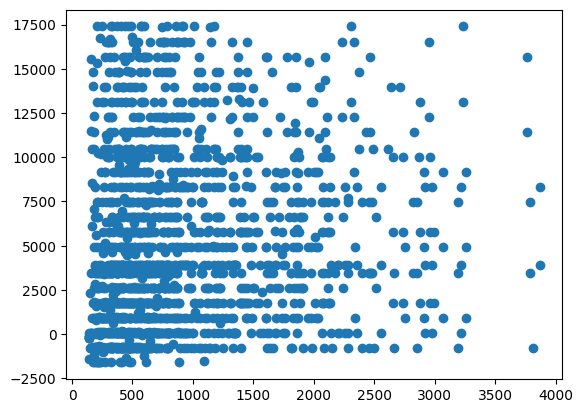

In [9]:
plt.scatter(pi_plus_energy, pi_plus_pos)
plt.show()

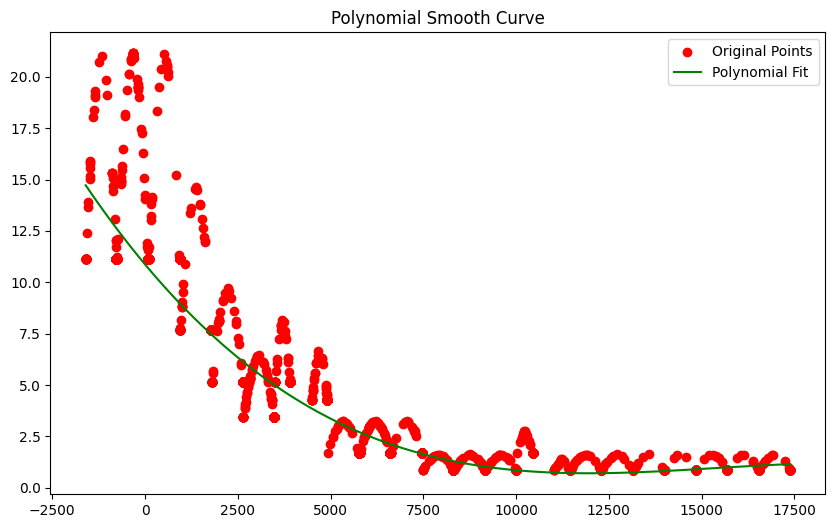

In [10]:
coefficients = np.polyfit(z, bz, 3)
polynomial = np.poly1d(coefficients)

# Generate smooth curve
z_smooth = np.linspace(z.min(), z.max(), 3000)
bz_smooth = polynomial(z_smooth)

plt.figure(figsize=(10, 6))
plt.scatter(z, bz, color='red', label='Original Points')
plt.plot(z_smooth, bz_smooth, 'g-', label='Polynomial Fit')
plt.legend()
plt.title('Polynomial Smooth Curve')
plt.show()

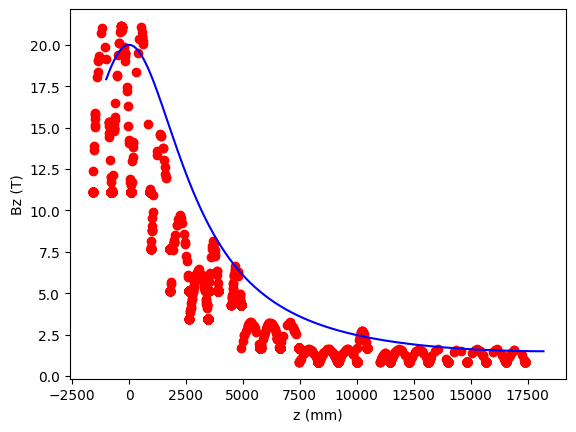

In [11]:
Bi = 20
Bf = 1.5
Lt = 18200
# -1< z < Lt
B = []

z_list = [i for i in range(-1000, 18201)] 

for zi in z_list:
    B_temp = (Bi*Bf*(Lt**3))/(Bi*(zi**2)*(3*Lt-2*zi)+Bf*((Lt-zi)**2)*(2*zi+Lt))
    B.append(B_temp)
    
plt.plot(z_list, B, color='blue', label='Original Points')
plt.scatter(z,bz, color='red', label='Expected plot')
plt.xlabel('z (mm)')
plt.ylabel('Bz (T)')
#plt.plot(z_smooth, bz_smooth, 'g-', label='Polynomial Fit')
plt.show()

In [12]:
data = pd.read_csv("6D_vector.csv")
data.head()

,Detector,ParticleType,x[cm],px[MeV/c],y[cm],py[MeV/c],z[cm],pz[MeV/c],TotalEnergy[MeV]
0,1,pi-,3.10894,213.0420,-9.15188,-19.9185,399.95,290.572,386.905
1,1,pi-,-3.70583,-114.9110,20.67010,163.1820,399.95,582.907,631.738
2,1,pi-,-2.25750,-156.8840,7.86234,-26.8159,399.95,1734.830,1747.700
3,2,pi-,-2.57579,130.5190,-33.18580,-73.0427,1049.95,1711.230,1723.410
4,3,pi-,51.19870,69.1091,-23.82740,85.3154,1749.95,1712.950,1722.130


In [13]:
det = np.array(data['Detector'].to_list())
particle = np.array(data['ParticleType'].to_list())
px = np.array(data['px[MeV/c]'].to_list())
py = np.array(data['py[MeV/c]'].to_list())
pz = np.array(data['pz[MeV/c]'].to_list())
x = np.array(data['x[cm]'].to_list())
y = np.array(data['y[cm]'].to_list())
z = np.array(data['z[cm]'].to_list())
det1_particles = []
det1_px = []
det1_py = []
det1_pz = []
det1_x = []
det1_y = []
det1_z = []
det2_particles = []
det2_px = []
det2_py = []
det2_pz = []
det2_x = []
det2_y = []
det2_z = []
det3_particles = []
det3_px = []
det3_py = []
det3_pz = []
det3_x = []
det3_y = []
det3_z = []

In [14]:
for i in range(0, len(det)):
    if det[i] == 1:
        det1_particles.append(particle[i])
        det1_px.append(px[i])
        det1_py.append(py[i])
        det1_pz.append(pz[i])
        det1_x.append(x[i])
        det1_y.append(y[i])
        det1_z.append(z[i])
    elif det[i] == 2:
        det2_particles.append(particle[i])
        det2_px.append(px[i])
        det2_py.append(py[i])
        det2_pz.append(pz[i])
        det2_x.append(x[i])
        det2_y.append(y[i])
        det2_z.append(z[i])
    elif det[i] == 3:
        det3_particles.append(particle[i])
        det3_px.append(px[i])
        det3_py.append(py[i])
        det3_pz.append(pz[i])
        det3_x.append(x[i])
        det3_y.append(y[i])
        det3_z.append(z[i])

len(det3_particles)

375

In [15]:
from collections import Counter

counts = Counter(det1_particles)
categories = list(counts.keys())
values = list(counts.values())

print(categories)
print(values)
pi_minus_count = []
pi_minus_count.append(values[0])
pi_plus_count = []
pi_plus_count.append(values[1])
mu_plus_count = []
mu_plus_count.append(values[2])
mu_minus_count = []
mu_minus_count.append(values[3])

['pi-', 'pi+', 'mu+', 'mu-']
[398, 480, 172, 136]


In [16]:
counts = Counter(det2_particles)
categories = list(counts.keys())
values = list(counts.values())

pi_minus_count.append(values[0])
pi_plus_count.append(values[1])
mu_plus_count.append(values[2])
mu_minus_count.append(values[3])

In [17]:
counts = Counter(det3_particles)
categories = list(counts.keys())
values = list(counts.values())

pi_minus_count.append(values[0])
pi_plus_count.append(values[1])
mu_plus_count.append(values[2])
mu_minus_count.append(values[3])

In [18]:
 len(det3_particles)/1000

0.375

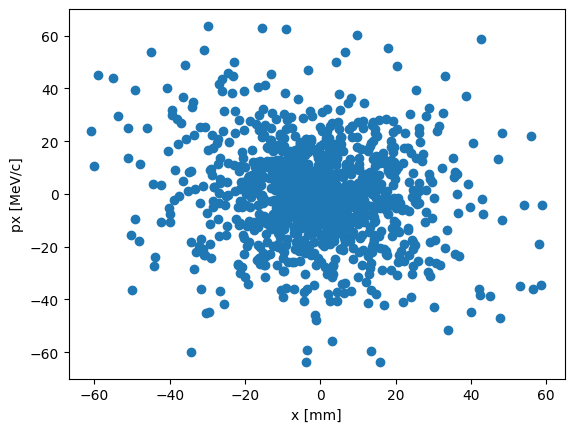

In [19]:
plt.scatter(det1_x,det1_y )
plt.xlabel("x [mm]")
plt.ylabel("px [MeV/c]")
plt.show()

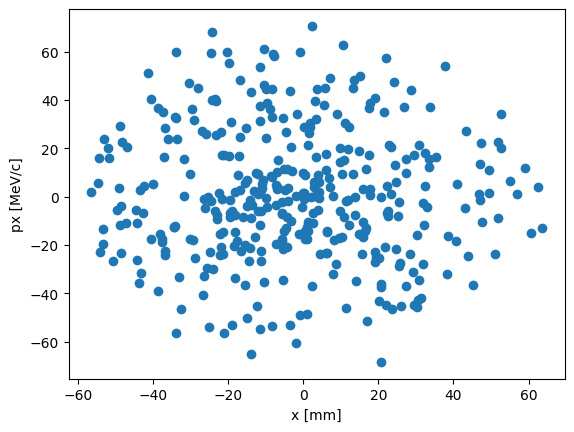

In [20]:
plt.scatter(det3_x,det3_y )
plt.xlabel("x [mm]")
plt.ylabel("px [MeV/c]")
plt.show()

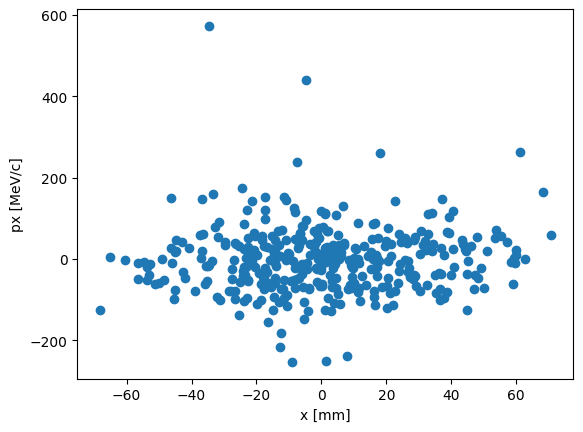

In [21]:
plt.scatter(det3_y,det3_py )
plt.xlabel("x [mm]")
plt.ylabel("px [MeV/c]")
plt.show()

In [22]:
def compute_and_plot_emittance(x_list, px_list, pz_list):
    # Convert lists to numpy arrays
    x = np.array(x_list)
    px = np.array(px_list)
    pz = np.array(pz_list)
    
    # Compute x' = px / pz
    xp = px / pz

    # Center data
    x_mean = np.mean(x)
    xp_mean = np.mean(xp)
    x_c = x - x_mean
    xp_c = xp - xp_mean

    # Compute statistical moments
    x2 = np.mean(x_c**2)
    xp2 = np.mean(xp_c**2)
    xxp = np.mean(x_c * xp_c)

    # Calculate geometric emittance
    emittance = np.sqrt(x2 * xp2 - xxp**2)
    print(f"Geometric Emittance: {emittance:.3e} m·rad")

    # Plotting phase space
    
    plt.scatter(x, xp*1e3, s=2, alpha=0.5)
    plt.xlabel("x [mm]")
    plt.ylabel("x' [mrad]")
    plt.title("Transverse Phase Space (x vs x')")
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    return emittance

Geometric Emittance: 8.528e+00 m·rad


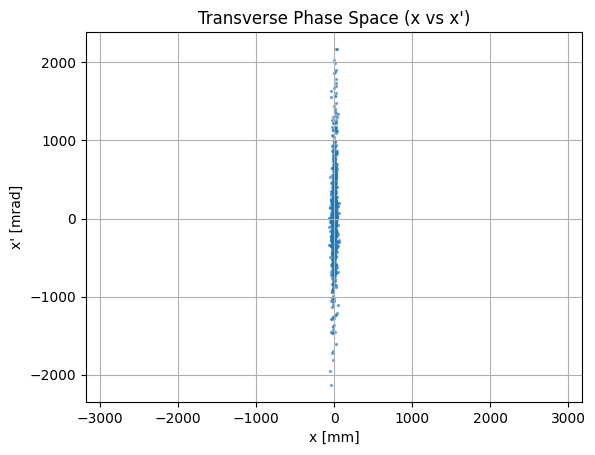

8.52824894355319

In [23]:
compute_and_plot_emittance(det1_x, det1_px, det1_pz)

Geometric Emittance: 5.212e+00 m·rad


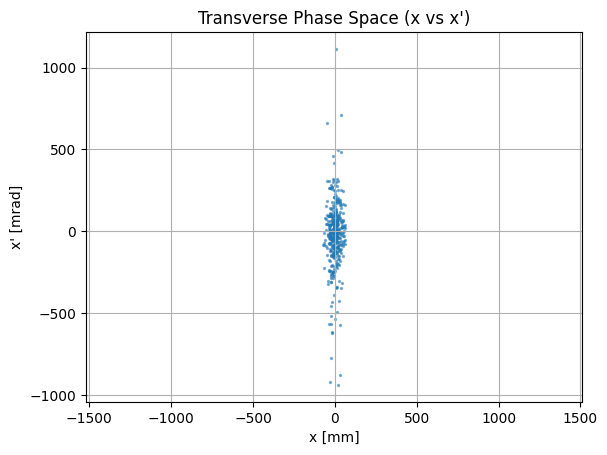

5.212345396469275

In [184]:
compute_and_plot_emittance(det3_x, det3_px, det3_pz)

In [185]:
det_pos = [4, 10.5, 17.5] # in meters

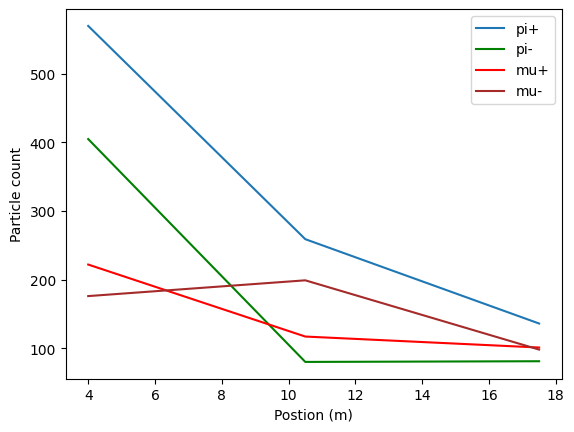

In [186]:
plt.plot(det_pos, pi_plus_count, label='pi+')
plt.plot(det_pos, pi_minus_count, color="green", label="pi-")
plt.plot(det_pos, mu_plus_count, color="red", label='mu+')
plt.plot(det_pos, mu_minus_count, color="brown", label='mu-')
plt.legend()
plt.xlabel("Postion (m)")
plt.ylabel("Particle count")
plt.show()

In [187]:
len(det3_particles)

416

In [154]:
len(det1_particles)

1487

In [155]:
len(det2_particles)

670